<a href="https://colab.research.google.com/github/DKethan/CrashAnalysis/blob/k-changes/Scalable_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyzing New York City Data with SQL, Python, and Version Control

Importing libraries

In [6]:
import pandas as pd
import warnings

Suppress all warnings


In [7]:
warnings.simplefilter(action='ignore', category=Warning)

In [9]:
crashes_df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20241108.csv')
person_df = pd.read_csv('Motor_Vehicle_Collisions_-_Person_20241110.csv')
vehicles_df = pd.read_csv('Motor_Vehicle_Collisions_-_Vehicles_20241110.csv')

# Motor Vechicle Collision - Crashes

Showing top 10 in data

In [10]:
crashes_df.head(10)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
5,04/14/2021,12:47,NaN,NaN,NaN,NaN,NaN,MAJOR DEEGAN EXPRESSWAY RAMP,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407458,Dump,Sedan,NaN,NaN,NaN
6,12/14/2021,17:05,NaN,NaN,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4486555,Sedan,Tractor Truck Diesel,NaN,NaN,NaN
7,12/14/2021,8:17,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,Unspecified,NaN,NaN,NaN,4486660,Sedan,Sedan,NaN,NaN,NaN
8,12/14/2021,21:10,BROOKLYN,11207.0,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,NaN,2047 PITKIN AVENUE,...,Unspecified,NaN,NaN,NaN,4487074,Sedan,NaN,NaN,NaN,NaN
9,12/14/2021,14:58,MANHATTAN,10017.0,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4486519,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [11]:
crashes_df.shape

(2132793, 29)

In [12]:
crashes_df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [13]:
crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132793 entries, 0 to 2132792
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [14]:
crashes_df.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.893428e+06,1.893428e+06,2.132775e+06,2.132762e+06,2.132793e+06,2.132793e+06,2.132793e+06,2.132793e+06,2.132793e+06,2.132793e+06,2.132793e+06
mean,4.062639e+01,-7.374972e+01,3.177738e-01,1.536505e-03,5.759115e-02,7.572230e-04,2.782736e-02,1.209681e-04,2.282195e-01,6.343794e-04,3.202153e+06
std,1.993111e+00,3.741723e+00,7.068783e-01,4.139149e-02,2.460991e-01,2.808083e-02,1.665938e-01,1.104044e-02,6.681149e-01,2.756146e-02,1.506644e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066761e+01,-7.397474e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.169318e+06
50%,4.072061e+01,-7.392710e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.702656e+06
75%,4.076961e+01,-7.386679e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.236090e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.769583e+06


# Checking Null Values

Checking for null values

In [15]:
crashes_df.isnull().sum()

,0
CRASH DATE,0
CRASH TIME,0
BOROUGH,662912
ZIP CODE,663173
LATITUDE,239365
LONGITUDE,239365
LOCATION,239365
ON STREET NAME,457025
CROSS STREET NAME,813144
OFF STREET NAME,1768141


In [16]:
# Find duplicate rows in the entire dataset
duplicate_rows = crashes_df[crashes_df.duplicated()]

# Display count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


In [17]:
# Find duplicate entries based on COLLISION_ID
duplicate_collision_ids = crashes_df[crashes_df.duplicated(subset=['COLLISION_ID'])]

# Display count of duplicate COLLISION_IDs
print(f"Number of duplicate COLLISION_IDs: {duplicate_collision_ids.shape[0]}")


Number of duplicate COLLISION_IDs: 0


We are focusing on clustering by BOROUGH and may need LOCATION (coordinates) for map visualization. Other location-related columns like ZIP Code, street names, latitude, and longitude are unnecessary for the analysis, so they're dropped to simplify the dataset.

In [18]:
# Define columns to drop, retaining only BOROUGH and LOCATION for location-based analysis
location_columns_to_drop = ['ZIP CODE', 'LATITUDE', 'LONGITUDE', 'ON STREET NAME',
                            'CROSS STREET NAME', 'OFF STREET NAME']

# Drop unnecessary columns related to location
crashes_df = crashes_df.drop(columns=location_columns_to_drop)

# Check the remaining columns to ensure only BOROUGH and LOCATION are retained for location-based analysis
print(crashes_df.columns)

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'LOCATION',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'],
      dtype='object')


Although there are five contributing factors, it is clear that factors 3, 4, and 5 are typically absent after adding up the empty rows for each. Keeping in mind that there are currently 2132793 rows, 92.81% of them are already missing by the third factor, and 93.08% of them are already missing by vehicle type code 3.

In [19]:
crashes_df = crashes_df.drop(columns=['CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'])

we need to fill in the missing values first. In this case, I replaced NaN with 0 then change it to int64.



In [20]:
crashes_df['NUMBER OF PERSONS KILLED'] = crashes_df['NUMBER OF PERSONS KILLED'].fillna('0').astype('int64')
crashes_df['NUMBER OF PERSONS INJURED'] = crashes_df['NUMBER OF PERSONS INJURED'].fillna('0').astype('int64')


In [21]:
crashes_df['CRASH DATE'] = pd.to_datetime(crashes_df['CRASH DATE'])
crashes_df['CRASH DATE'] = crashes_df['CRASH DATE'].dt.date
crashes_df['CRASH DATE'] = crashes_df['CRASH DATE'].astype(str)

crashes_df['DateTime'] = pd.to_datetime(crashes_df['CRASH DATE'] + ' ' +crashes_df['CRASH TIME'])


crashes_df['CRASH DATE'] = pd.to_datetime(crashes_df['DateTime'])


In [22]:
crashes_df = crashes_df.drop(columns=['CRASH TIME','DateTime'])

In [23]:
missing_borough = crashes_df['BOROUGH'].isnull().sum()
print("There are total of", missing_borough)

There are total of 662912


The missing values for the borough (662912 rows) comprised 31.08% of the dataset so we decided to replace the NaN with ‘unspecified’ instead of dropping them.

In [24]:
crashes_df['BOROUGH'].fillna('Unspecified', inplace=True)

In [25]:
# Merge two columns of factors
total_factors = pd.concat([crashes_df['CONTRIBUTING FACTOR VEHICLE 1'], crashes_df['CONTRIBUTING FACTOR VEHICLE 2']], ignore_index=True)

# Turn into a DataFrame that we can sort
df_total_factors = pd.DataFrame(total_factors, columns=['All_factors'])

# Sort
df_total_factors.sort_values(by='All_factors', inplace=True)

# Display all rows
#pd.set_option('display.max_rows', None)

print(df_total_factors.nunique())

All_factors    61
dtype: int64


In [26]:
df_total_factors['All_factors'].unique()

array(['1', '80', 'Accelerator Defective', 'Aggressive Driving/Road Rage',
       'Alcohol Involvement', 'Animals Action', 'Backing Unsafely',
       'Brakes Defective', 'Cell Phone (hand-Held)',
       'Cell Phone (hand-held)', 'Cell Phone (hands-free)',
       'Driver Inattention/Distraction', 'Driver Inexperience',
       'Driverless/Runaway Vehicle', 'Drugs (Illegal)', 'Drugs (illegal)',
       'Eating or Drinking', 'Failure to Keep Right',
       'Failure to Yield Right-of-Way', 'Fatigued/Drowsy', 'Fell Asleep',
       'Following Too Closely', 'Glare', 'Headlights Defective', 'Illnes',
       'Illness', 'Lane Marking Improper/Inadequate',
       'Listening/Using Headphones', 'Lost Consciousness',
       'Obstruction/Debris', 'Other Electronic Device',
       'Other Lighting Defects', 'Other Vehicular',
       'Outside Car Distraction', 'Oversized Vehicle',
       'Passenger Distraction', 'Passing Too Closely',
       'Passing or Lane Usage Improper', 'Pavement Defective',
       '

There are 61 unique values for the factors, and printing them in full revealed that there were indeed misspellings of some terms (e.g. Illnes and Ilness).

In [27]:
replacements = {
    'Cellphone (hand-held)': {'Cell Phone (hand-Held)', 'Cell Phone (hand-held)'},
    'Drugs (illegal)': {'Drugs (Illegal)', 'Drugs (illegal)'},
    'Illness': {'Illnes', 'Illness'},
    'Reaction to Uninvolved Vehicle': {'Reaction to Other Uninvolved Vehicle', 'Reaction to Uninvolved Vehicle'}
}

In [28]:
crashes_df['CONTRIBUTING FACTOR VEHICLE 1'] = crashes_df['CONTRIBUTING FACTOR VEHICLE 1'].replace(replacements)
crashes_df['CONTRIBUTING FACTOR VEHICLE 2'] = crashes_df['CONTRIBUTING FACTOR VEHICLE 2'].replace(replacements)

In [29]:
crashes_df['CONTRIBUTING FACTOR VEHICLE 1'].fillna('Unspecified', inplace=True)
crashes_df['CONTRIBUTING FACTOR VEHICLE 2'].fillna('Unspecified', inplace=True)

In [30]:
crashes_df['CONTRIBUTING FACTOR VEHICLE 1'] = crashes_df['CONTRIBUTING FACTOR VEHICLE 1'].apply(str)
crashes_df['CONTRIBUTING FACTOR VEHICLE 2'] = crashes_df['CONTRIBUTING FACTOR VEHICLE 2'].apply(str)


In [31]:
crashes_df['VEHICLE TYPE CODE 1'].fillna('Unspecified', inplace=True)
crashes_df['VEHICLE TYPE CODE 2'].fillna('Unspecified', inplace=True)

# Motor Vechicle Collison - Persons

In [32]:
person_df.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,...,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,...,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F


In [33]:
person_df.shape

(5519439, 21)

In [34]:
person_df.columns

Index(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'PERSON_ID',
       'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID', 'PERSON_AGE', 'EJECTION',
       'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT', 'PED_LOCATION', 'PED_ACTION', 'COMPLAINT',
       'PED_ROLE', 'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2',
       'PERSON_SEX'],
      dtype='object')

In [35]:
person_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5519439 entries, 0 to 5519438
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   UNIQUE_ID              int64  
 1   COLLISION_ID           int64  
 2   CRASH_DATE             object 
 3   CRASH_TIME             object 
 4   PERSON_ID              object 
 5   PERSON_TYPE            object 
 6   PERSON_INJURY          object 
 7   VEHICLE_ID             float64
 8   PERSON_AGE             float64
 9   EJECTION               object 
 10  EMOTIONAL_STATUS       object 
 11  BODILY_INJURY          object 
 12  POSITION_IN_VEHICLE    object 
 13  SAFETY_EQUIPMENT       object 
 14  PED_LOCATION           object 
 15  PED_ACTION             object 
 16  COMPLAINT              object 
 17  PED_ROLE               object 
 18  CONTRIBUTING_FACTOR_1  object 
 19  CONTRIBUTING_FACTOR_2  object 
 20  PERSON_SEX             object 
dtypes: float64(2), int64(2), object(17)
memory usage: 884.

In [36]:
person_df.describe()

,UNIQUE_ID,COLLISION_ID,VEHICLE_ID,PERSON_AGE
count,5.519439e+06,5.519439e+06,5.293926e+06,4.918256e+06
mean,9.156983e+06,3.972859e+06,1.858683e+07,3.734325e+01
std,2.669585e+06,6.554778e+05,1.581655e+06,1.131559e+02
min,1.092200e+04,3.700000e+01,1.234230e+05,-9.990000e+02
25%,7.022288e+06,3.687738e+06,1.756502e+07,2.400000e+01
50%,9.418876e+06,4.022833e+06,1.873284e+07,3.600000e+01
75%,1.151825e+07,4.374459e+06,1.980598e+07,5.000000e+01
max,1.320011e+07,4.769583e+06,2.077853e+07,9.999000e+03


# Checking Null values

In [37]:
#checking null values
person_df.isnull().sum()

,0
UNIQUE_ID,0
COLLISION_ID,0
CRASH_DATE,0
CRASH_TIME,0
PERSON_ID,19
PERSON_TYPE,0
PERSON_INJURY,0
VEHICLE_ID,225513
PERSON_AGE,601183
EJECTION,2684796


finding duplicate values

In [38]:
# Find duplicate rows in the entire dataset
duplicate_rows = person_df[person_df.duplicated()]

# Display count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


In [39]:
# Find duplicate entries based on COLLISION_ID
duplicate_collision_ids = person_df[person_df.duplicated(subset=['UNIQUE_ID'])]

# Display count of duplicate COLLISION_IDs
print(f"Number of duplicate UNIQUE_IDs: {duplicate_collision_ids.shape[0]}")


Number of duplicate UNIQUE_IDs: 0


it is clear that factors 1, 2, and ped_location and Ped_action are typically absent after adding up the empty rows for each. Keeping in mind that there are currently 98.37% of them are already missing.

In [40]:
person_df = person_df.drop(columns=['CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2', 'PED_ACTION', 'PED_LOCATION'])

As person_id has less number of null values we have removed them.

In [41]:
person_df = person_df.dropna(subset=['PERSON_ID'])

Filling person_sex with "U" and other columns with Unknown

In [42]:
person_df['PERSON_SEX'] = person_df['PERSON_SEX'].fillna('U')

In [43]:
columns_to_fill = ['EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY',
                   'POSITION_IN_VEHICLE', 'SAFETY_EQUIPMENT',
                   'COMPLAINT', 'PED_ROLE']

# Fill missing values with 'Unknown' in the specified columns
person_df[columns_to_fill] = person_df[columns_to_fill].fillna('Unknown')

In [44]:
col_to_fill = ['VEHICLE_ID', 'PERSON_AGE']
person_df[col_to_fill] = person_df[col_to_fill].fillna(0)

# Convert columns to 'int64'
person_df[col_to_fill] = person_df[col_to_fill].astype('int64')

Merging Crash date and crash time in one column

In [45]:
person_df['CRASH_DATE'] = pd.to_datetime(person_df['CRASH_DATE'])
person_df['CRASH_DATE'] = person_df['CRASH_DATE'].dt.date
person_df['CRASH_DATE'] = person_df['CRASH_DATE'].astype(str)

person_df['DateTime'] = pd.to_datetime(person_df['CRASH_DATE'] + ' ' +person_df['CRASH_TIME'])


person_df['CRASH_DATE'] = pd.to_datetime(person_df['DateTime'])


In [46]:
person_df = person_df.drop(columns=['CRASH_TIME','DateTime'])

In [47]:
#checking null values
person_df.isnull().sum()

,0
UNIQUE_ID,0
COLLISION_ID,0
CRASH_DATE,0
PERSON_ID,0
PERSON_TYPE,0
PERSON_INJURY,0
VEHICLE_ID,0
PERSON_AGE,0
EJECTION,0
EMOTIONAL_STATUS,0


# Motor Vechicle Collision - Vehichle

In [48]:
vehicles_df.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
0,10385780,100201,09/07/2012,9:03,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
1,19140702,4213082,09/23/2019,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,2002.0,...,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified
2,14887647,3307608,10/02/2015,17:18,2,NY,TAXI,NaN,NaN,NaN,...,Going Straight Ahead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver Inattention/Distraction,NaN
3,14889754,3308693,10/04/2015,20:34,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,Parked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
4,14400270,297666,04/25/2013,21:15,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Vehicular,NaN


In [49]:
vehicles_df.shape

(4280967, 25)

In [50]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4280967 entries, 0 to 4280966
Data columns (total 25 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   UNIQUE_ID                    int64  
 1   COLLISION_ID                 int64  
 2   CRASH_DATE                   object 
 3   CRASH_TIME                   object 
 4   VEHICLE_ID                   object 
 5   STATE_REGISTRATION           object 
 6   VEHICLE_TYPE                 object 
 7   VEHICLE_MAKE                 object 
 8   VEHICLE_MODEL                object 
 9   VEHICLE_YEAR                 float64
 10  TRAVEL_DIRECTION             object 
 11  VEHICLE_OCCUPANTS            float64
 12  DRIVER_SEX                   object 
 13  DRIVER_LICENSE_STATUS        object 
 14  DRIVER_LICENSE_JURISDICTION  object 
 15  PRE_CRASH                    object 
 16  POINT_OF_IMPACT              object 
 17  VEHICLE_DAMAGE               object 
 18  VEHICLE_DAMAGE_1             object 
 19  

In [51]:
vehicles_df.describe()

,UNIQUE_ID,COLLISION_ID,VEHICLE_YEAR,VEHICLE_OCCUPANTS
count,4.280967e+06,4.280967e+06,2.358293e+06,2.486191e+06
mean,1.665047e+07,3.216123e+06,2.015247e+03,1.101472e+03
std,3.368861e+06,1.498422e+06,1.473923e+02,9.431148e+05
min,1.117110e+05,2.200000e+01,1.000000e+03,0.000000e+00
25%,1.459110e+07,3.175408e+06,2.008000e+03,1.000000e+00
50%,1.759921e+07,3.710884e+06,2.014000e+03,1.000000e+00
75%,1.953133e+07,4.242520e+06,2.017000e+03,1.000000e+00
max,2.077853e+07,4.769583e+06,2.006300e+04,1.000000e+09


# Checking Null values

In [52]:
#checking null values
vehicles_df.isnull().sum()

,0
UNIQUE_ID,0
COLLISION_ID,0
CRASH_DATE,0
CRASH_TIME,0
VEHICLE_ID,0
STATE_REGISTRATION,322943
VEHICLE_TYPE,248378
VEHICLE_MAKE,1901277
VEHICLE_MODEL,4229587
VEHICLE_YEAR,1922674


In [53]:
# Find duplicate rows in the entire dataset
duplicate_rows = vehicles_df[vehicles_df.duplicated()]

# Display count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


In [54]:
# Find duplicate entries based on COLLISION_ID
duplicate_collision_ids = vehicles_df[vehicles_df.duplicated(subset=['UNIQUE_ID'])]

# Display count of duplicate COLLISION_IDs
print(f"Number of duplicate UNIQUE_IDs: {duplicate_collision_ids.shape[0]}")


Number of duplicate UNIQUE_IDs: 0


it is clear that PUBLIC_PROPERTY_DAMAGE_TYPE and VEHICLE_MODEL are typically absent after adding up the empty rows for each. Keeping in mind that there are currently 99.36% of them are already missing.

In [55]:
vehicles_df = vehicles_df.drop(columns=['PUBLIC_PROPERTY_DAMAGE_TYPE','VEHICLE_MODEL'])

In [56]:
# Convert 'CRASH_DATE' to datetime and extract the date part
vehicles_df['CRASH_DATE'] = pd.to_datetime(vehicles_df['CRASH_DATE'], errors='coerce')
vehicles_df['CRASH_DATE'] = vehicles_df['CRASH_DATE'].dt.date.astype(str)

# Combine 'CRASH_DATE' and 'CRASH_TIME' and handle missing values
vehicles_df['DateTime'] = pd.to_datetime(
    vehicles_df['CRASH_DATE'] + ' ' + vehicles_df['CRASH_TIME'],
    errors='coerce'
)

# Re-assign 'CRASH_DATE' to the combined DateTime column if needed
vehicles_df['CRASH_DATE'] = vehicles_df['DateTime'].dt.date


In [57]:
vehicles_df = vehicles_df.drop(columns=['CRASH_TIME','DateTime'])

In [58]:
columns_to_fill = ['CONTRIBUTING_FACTOR_1','CONTRIBUTING_FACTOR_2','PUBLIC_PROPERTY_DAMAGE']
vehicles_df[columns_to_fill] = vehicles_df[columns_to_fill].fillna('Unspecified')

In [59]:
vehicles_df['DRIVER_SEX'] = vehicles_df['DRIVER_SEX'].fillna('U')

In [60]:
# Convert float columns to int and fill NaN values with 0
vehicles_df['VEHICLE_YEAR'] = vehicles_df['VEHICLE_YEAR'].fillna(0).astype(int)
vehicles_df['VEHICLE_OCCUPANTS'] = vehicles_df['VEHICLE_OCCUPANTS'].fillna(0).astype(int)


In [61]:
# Select object columns and exclude specified columns
object_columns = vehicles_df.select_dtypes(include='object').columns
object_columns = [col for col in object_columns if col not in ['CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2', 'PUBLIC_PROPERTY_DAMAGE']]

# Fill NaN values in remaining object columns with 'Unknown'
vehicles_df[object_columns] = vehicles_df[object_columns].fillna('Unknown')

In [62]:
#checking null values
vehicles_df.isnull().sum()

,0
UNIQUE_ID,0
COLLISION_ID,0
CRASH_DATE,0
VEHICLE_ID,0
STATE_REGISTRATION,0
VEHICLE_TYPE,0
VEHICLE_MAKE,0
VEHICLE_YEAR,0
TRAVEL_DIRECTION,0
VEHICLE_OCCUPANTS,0


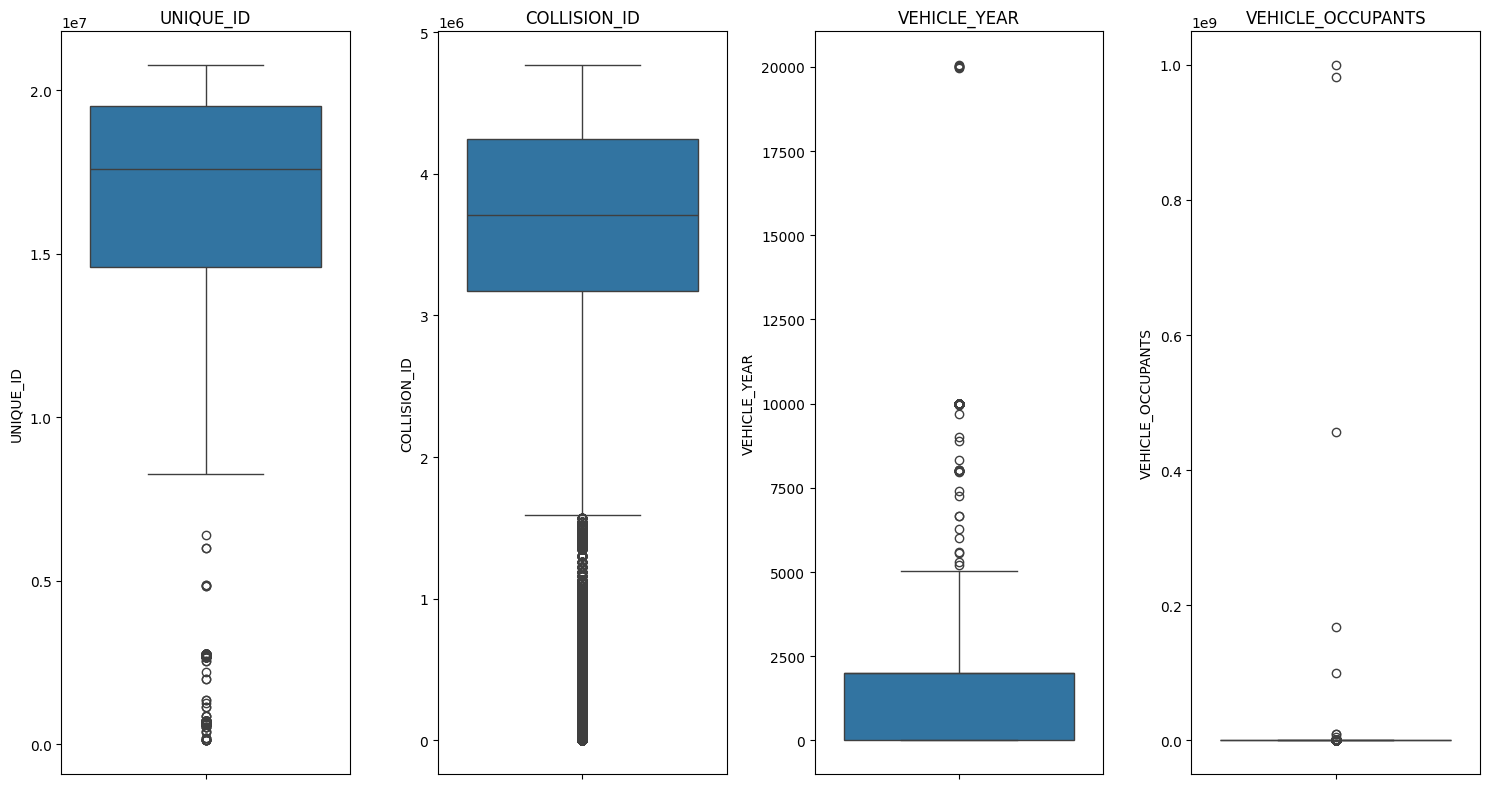

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = vehicles_df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = [col for col in numerical_columns ]

# Set up the plot
plt.figure(figsize=(15, 8))

# Plot a boxplot for each numerical column
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=vehicles_df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()



For inserting SQL into Python

In [ ]:
import sqlite3

# Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Load each DataFrame into the SQLite database as a separate table
crashes_df.to_sql('crashes', conn, index=False, if_exists='replace')
person_df.to_sql('person', conn, index=False, if_exists='replace')
vehicles_df.to_sql('vehicles', conn, index=False, if_exists='replace')

# SQL query to merge the tables on COLLISION_ID
query = """
SELECT crashes.*, person.*, vehicles.*
FROM crashes
JOIN person ON crashes.COLLISION_ID = person.COLLISION_ID
JOIN vehicles ON crashes.COLLISION_ID = vehicles.COLLISION_ID;
"""

# Execute the query and load the result into a DataFrame
merged_df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Display the merged DataFrame
print(merged_df.head())


#Data Visualization

Now lets see the merged data

In [ ]:
merged_df.head()

In [ ]:
merged_df.shape

In [ ]:
merged_df.columns

Finding duplicate columns

In [ ]:
duplicate_columns = merged_df.columns[merged_df.columns.duplicated()]

if len(duplicate_columns) > 0:
  print("Duplicate columns found:")
  print(duplicate_columns)
else:
  print("No duplicate columns found.")

In [ ]:
merged_df.info()

In [ ]:
merged_df.describe()

In [ ]:
merged_df.isnull().sum()

In [ ]:
merged_df.duplicated().sum()

In [ ]:
merged_df.nunique()

Checking for outliers in numerical columns using box plots

In [ ]:
# Check for outliers in numerical columns using box plots
numerical_columns = merged_df.select_dtypes(include=['int64', 'float64']).columns

# Set up the plot
plt.figure(figsize=(15, 8))

# Plot a boxplot for each numerical column
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=merged_df[col])
    plt.title(col)
    plt.tight_layout()

Create a pairplot to visualize relationships between numerical variables

In [ ]:
sns.pairplot(merged_df[numerical_columns])
plt.show()

# Create a correlation heatmap to understand relationships between numerical variables
correlation_matrix = merged_df[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# prompt: code to find if there is any dubilacate column in merged_df

duplicate_columns = merged_df.columns[merged_df.columns.duplicated()]

if len(duplicate_columns) > 0:
  print("Duplicate columns found:")
  print(duplicate_columns)
else:
  print("No duplicate columns found.")

In [ ]:
# prompt: give me code to check like seeing df. head , is null, outliers, pairplot, heatmap, more

# Check for null values in the merged DataFrame
print(merged_df.isnull().sum())

# Check for outliers in numerical columns using box plots
numerical_columns = merged_df.select_dtypes(include=['int64', 'float64']).columns

# Set up the plot
plt.figure(figsize=(15, 8))

# Plot a boxplot for each numerical column
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=merged_df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

# Create a pairplot to visualize relationships between numerical variables
sns.pairplot(merged_df[numerical_columns])
plt.show()

# Create a correlation heatmap to understand relationships between numerical variables
correlation_matrix = merged_df[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# More advanced analysis and visualization can be done based on your specific research questions.
# For example, you could:
# - Analyze the distribution of crashes by borough
# - Explore the relationship between contributing factors and severity of crashes
# - Visualize the location of crashes on a map
# - Perform time series analysis to identify trends in crashes over time
# - Build predictive models to forecast crash occurrences.



In [ ]:
# prompt: Data Visualization: You will create a minimum of three data visualizations that help convey key insights from your analysis. Clearly explain the significance of each visualization in understanding NYC. give as many as u can give

# 1. Number of Crashes by Borough
plt.figure(figsize=(10, 6))
borough_counts = crashes_df['BOROUGH'].value_counts()
sns.barplot(x=borough_counts.index, y=borough_counts.values)
plt.title('Number of Crashes by Borough in NYC')
plt.xlabel('Borough')
plt.ylabel('Number of Crashes')
plt.show()

# Significance: This visualization helps us understand which boroughs experience the highest number of crashes, providing insights into areas requiring more attention in terms of traffic safety measures.


# 2. Crashes Over Time
crashes_df['CRASH_DATE'] = pd.to_datetime(crashes_df['CRASH_DATE'])
crashes_df['Year'] = crashes_df['CRASH_DATE'].dt.year
crashes_by_year = crashes_df.groupby('Year')['COLLISION_ID'].count()
plt.figure(figsize=(12, 6))
plt.plot(crashes_by_year.index, crashes_by_year.values)
plt.title('Number of Crashes Over Time in NYC')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.show()

# Significance: This visualization shows the trend of crashes over time, helping us identify any increasing or decreasing patterns in accidents and understand potential contributing factors related to traffic infrastructure or driving behavior changes.


# 3. Top Contributing Factors to Crashes
factor_counts = crashes_df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()
top_factors = factor_counts[:10]  # Get top 10 factors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_factors.values, y=top_factors.index)
plt.title('Top Contributing Factors to Crashes in NYC')
plt.xlabel('Number of Crashes')
plt.ylabel('Contributing Factor')
plt.show()

# Significance: This visualization highlights the most frequent causes of crashes, which can inform targeted interventions to improve driver behavior, traffic infrastructure, or address specific contributing factors like driver distraction or fatigue.

# 4. Distribution of Injuries and Fatalities by Borough
plt.figure(figsize=(10, 6))
sns.boxplot(x='BOROUGH', y='NUMBER OF PERSONS INJURED', data=crashes_df)
plt.title('Distribution of Injuries by Borough in NYC')
plt.xlabel('Borough')
plt.ylabel('Number of Persons Injured')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='BOROUGH', y='NUMBER OF PERSONS KILLED', data=crashes_df)
plt.title('Distribution of Fatalities by Borough in NYC')
plt.xlabel('Borough')
plt.ylabel('Number of Persons Killed')
plt.show()

# Significance: These visualizations show the severity of crashes in different boroughs by analyzing the distribution of injuries and fatalities, which can help city planners and safety officials to allocate resources and implement targeted safety measures to address specific borough-related risks.


# 5. Relationship between Vehicle Type and Crash Severity
plt.figure(figsize=(12, 6))
sns.countplot(x='VEHICLE TYPE CODE 1', hue='NUMBER OF PERSONS INJURED', data=crashes_df)
plt.title('Relationship Between Vehicle Type and Number of Injuries')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)
plt.show()

# Significance: This visualization explores the potential correlation between the type of vehicle involved and the severity of the crash in terms of injuries.  It can inform decisions about vehicle safety regulations or policies targeting specific vehicle types known to be more frequently involved in severe crashes.
